<a href="https://colab.research.google.com/github/GUPTARAHULONE/Credit-card-Fraudalent/blob/readme-edits/Credit_card_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [ ]:
data = pd.read_csv("creditcard.csv")

 Insliasing Data

In [ ]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
print(data.shape)

(284807, 31)


In [ ]:
print(data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [ ]:
data=data.sample(frac=0.1,random_state=1)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1  ...        Amount         Class
count   28481.000000  28481.000000  ...  28481.000000  28481.000000
mean    94705.035216     -0.001143  ...     89.957884      0.001720
std     47584.727034      1.994661  ...    270.894630      0.041443
min         0.000000    -40.470142  ...      0.000000      0.000000
25%     53924.000000     -0.908809  ...      5.980000      0.000000
50%     84551.000000      0.031139  ...     22.350000      0.000000
75%    139392.000000      1.320048  ...     78.930000      0.000000
max    172784.000000      2.411499  ...  19656.530000      1.000000

[8 rows x 31 columns]


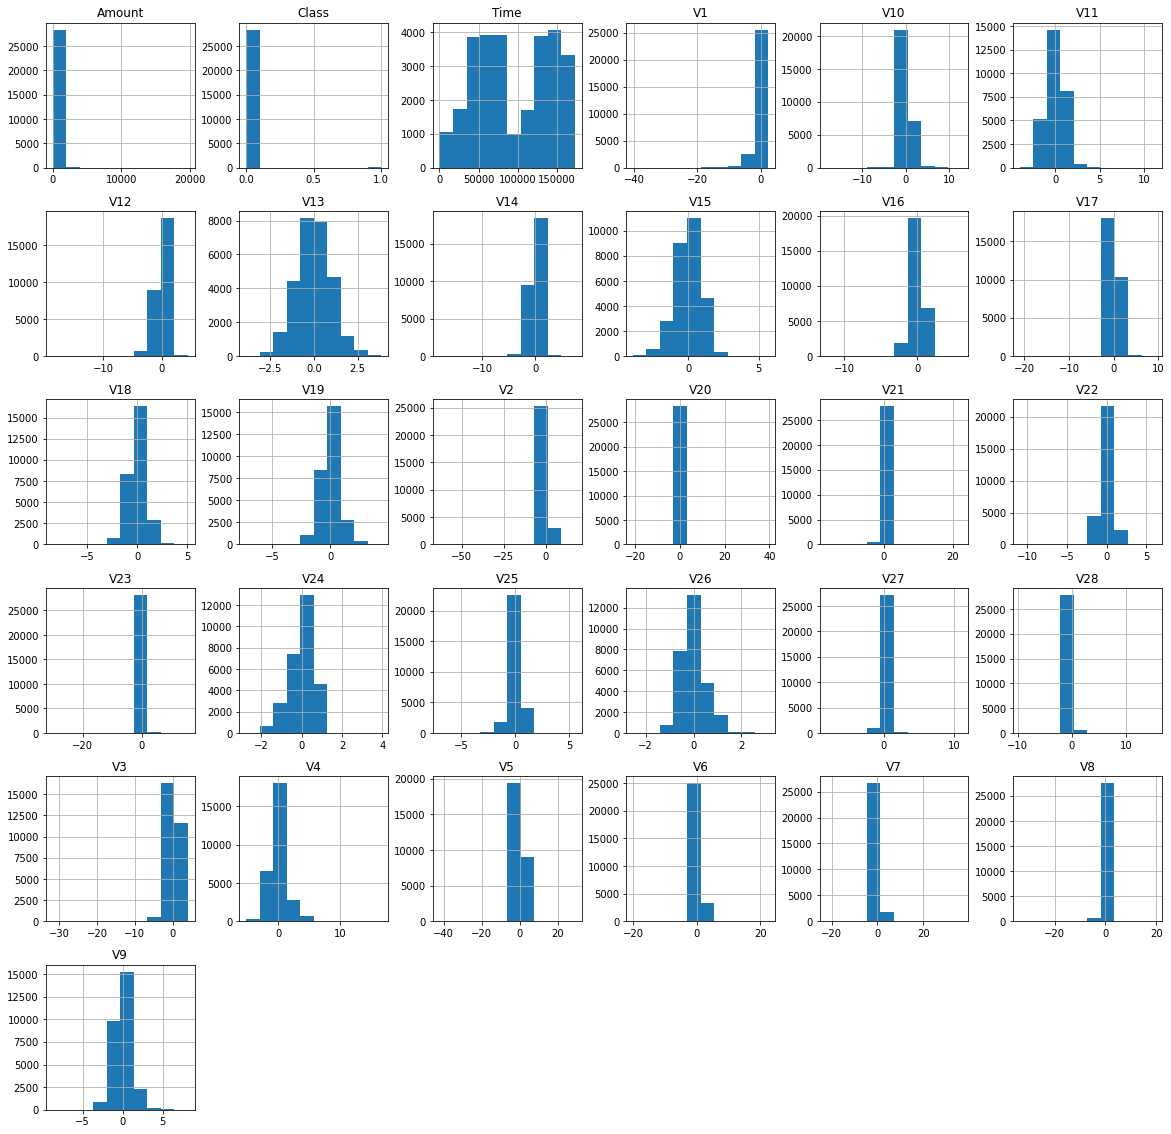

In [ ]:
data.hist(figsize=(20,20))
plt.show()

Transactions

In [ ]:
fraud=data[data['Class'] == 1]
valid=data[data['Class']==0]
Fraction = len(fraud)/(len(valid))
print(Fraction)
Fraction=float(Fraction)*100
print("% fraction=",Fraction)

print('Fraud cases={}'.format(len(fraud)))
print('valid cases={}'.format(len(valid)))

0.0017234102419808666
% fraction= 0.17234102419808667
Fraud cases=49
valid cases=28432


Amount transaction of fraud cases


In [ ]:
fraud.Amount.describe()

count      49.000000
mean      173.505306
std       387.996569
min         0.000000
25%         1.000000
50%         4.900000
75%       122.680000
max      2125.870000
Name: Amount, dtype: float64

Amount transaction of valid cases

In [ ]:
valid.Amount.describe()

count    28432.000000
mean        89.813898
std        270.636594
min          0.000000
25%          5.990000
50%         22.380000
75%         78.820000
max      19656.530000
Name: Amount, dtype: float64

correlation between data

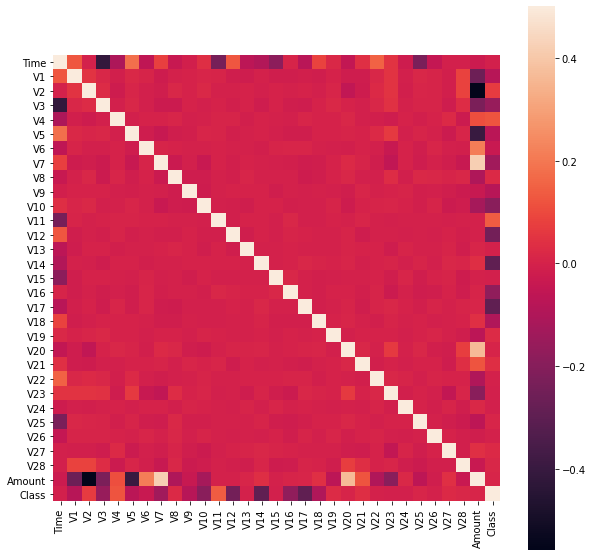

In [ ]:
correlation=data.corr()
fig=plt.figure(figsize=(10,10))

sns.heatmap(correlation,vmax=0.5,square=True)
plt.show()

Data division on x and y axis

In [ ]:
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape)
x = X.values 
y = Y.values 

(28481, 30)
(28481,)


Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 150)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=150,
                       verbose=0, warm_start=False)

Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("confusion Matrix")

print(cm)

print("Accuracy Score")

accuracy_score(y_test, y_pred)

confusion Matrix
[[5690    0]
 [   2    5]]
Accuracy Score


0.9996489380375636

Other Parameters

In [ ]:
 from sklearn.metrics import precision_score,recall_score,f1_score
 print("Precision Score")
 precision=precision_score(y_test,y_pred)
 print(precision)
 print("Recall Score")
 recall=recall_score(y_test, y_pred)
 print(recall)
 print("F1 Score")
 f1=f1_score(y_test, y_pred)
 print(f1)

Precision Score
1.0
Recall Score
0.7142857142857143
F1 Score
0.8333333333333333
